In [1]:
#import library
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/tiengiay/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/nhandien/validation',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 188 images belonging to 11 classes.
Found 11 images belonging to 11 classes.


In [3]:
train_dataset.classes
train_dataset.class_indices

{'100k': 0,
 '10k': 1,
 '1k': 2,
 '200': 3,
 '200k': 4,
 '20k': 5,
 '2k': 6,
 '500': 7,
 '500k': 8,
 '50k': 9,
 '5k': 10}

In [4]:
import pandas as pd # xử lý mảng
import seaborn as sns # đồ thị
import matplotlib.pyplot as plt # vẽ đồ thị
from sklearn.preprocessing import StandardScaler  # xử lý dữ liệu , dữ liệu không đồng đều
from sklearn.model_selection import train_test_split # chia dữ liệu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM #chuẩn của ANN
from keras.models import Sequential 
from tensorflow.keras.utils import to_categorical #để đảm bảo độ chính xác cao 
from keras import callbacks 
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong

In [5]:
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

2022-05-24 08:41:42.376078: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

2022-05-24 08:41:43.167908: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
19/19 [==============================] - 14s 652ms/step - loss: 2.6119 - accuracy: 0.1117 - val_loss: 2.3665 - val_accuracy: 0.0909
Epoch 2/50
19/19 [==============================] - 11s 582ms/step - loss: 2.3486 - accuracy: 0.1543 - val_loss: 2.2540 - val_accuracy: 0.2727
Epoch 3/50
19/19 [==============================] - 11s 583ms/step - loss: 2.2319 - accuracy: 0.2340 - val_loss: 2.1117 - val_accuracy: 0.1818
Epoch 4/50
19/19 [==============================] - 12s 616ms/step - loss: 2.0095 - accuracy: 0.2979 - val_loss: 1.7171 - val_accuracy: 0.3636
Epoch 5/50
19/19 [==============================] - 11s 597ms/step - loss: 2.0218 - accuracy: 0.2606 - val_loss: 1.7000 - val_accuracy: 0.2727
Epoch 6/50
19/19 [==============================] - 11s 581ms/step - loss: 1.5477 - accuracy: 0.5106 - val_loss: 1.5565 - val_accuracy: 0.6364
Epoch 7/50
19/19 [==============================] - 11s 588ms/step - loss: 1.7920 - accuracy: 0.3989 - val_loss: 1.3099 - val_accuracy: 0.8182

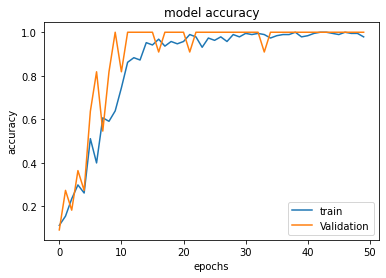

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [10]:
#in sai so va do chinh xac
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.00041017148760147393
Độ chính xác  1.0


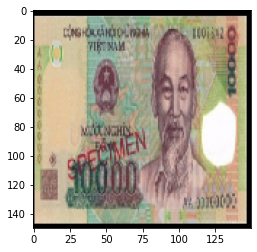

Tờ tiền 10k


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/nhandien/validation/10k/e0.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Tờ tiền 100k")
if(kq==1):
    print("Tờ tiền 10k")
if(kq==2):
    print("Tờ tiền 1k")
if(kq==3):
    print("Tờ tiền 200")    
if(kq==4):
    print("Tờ tiền 200k")
if(kq==5):
    print("Tờ tiền 20k")
if(kq==6):
    print("Tờ tiền 2k")
if(kq==7):
    print("Tờ tiền 500")
if(kq==8):
    print("Tờ tiền 500k")
if(kq==9):
    print("Tờ tiền 50k")
if(kq==10):
    print("Tờ tiền 5k")

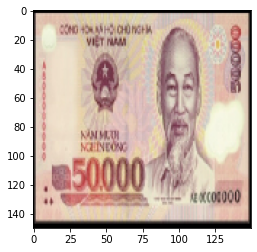

Tờ tiền 50k


In [12]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/nhandien/validation/50k/d0.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Tờ tiền 100k")
if(kq==1):
    print("Tờ tiền 10k")
if(kq==2):
    print("Tờ tiền 1k")
if(kq==3):
    print("Tờ tiền 200")    
if(kq==4):
    print("Tờ tiền 200k")
if(kq==5):
    print("Tờ tiền 20k")
if(kq==6):
    print("Tờ tiền 2k")
if(kq==7):
    print("Tờ tiền 500")
if(kq==8):
    print("Tờ tiền 500k")
if(kq==9):
    print("Tờ tiền 50k")
if(kq==10):
    print("Tờ tiền 5k")

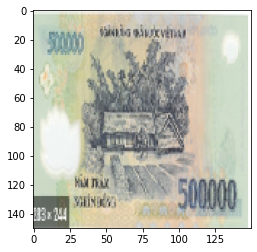

Tờ tiền 500k


In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/nhandien/validation/500k/a1.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Tờ tiền 100k")
if(kq==1):
    print("Tờ tiền 10k")
if(kq==2):
    print("Tờ tiền 1k")
if(kq==3):
    print("Tờ tiền 200")    
if(kq==4):
    print("Tờ tiền 200k")
if(kq==5):
    print("Tờ tiền 20k")
if(kq==6):
    print("Tờ tiền 2k")
if(kq==7):
    print("Tờ tiền 500")
if(kq==8):
    print("Tờ tiền 500k")
if(kq==9):
    print("Tờ tiền 50k")
if(kq==10):
    print("Tờ tiền 5k")

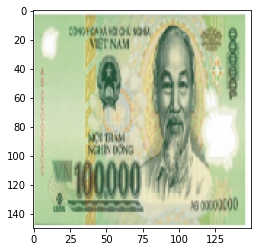

Tờ tiền 100k


In [14]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/nhandien/validation/100k/c1.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Tờ tiền 100k")
if(kq==1):
    print("Tờ tiền 10k")
if(kq==2):
    print("Tờ tiền 1k")
if(kq==3):
    print("Tờ tiền 200")    
if(kq==4):
    print("Tờ tiền 200k")
if(kq==5):
    print("Tờ tiền 20k")
if(kq==6):
    print("Tờ tiền 2k")
if(kq==7):
    print("Tờ tiền 500")
if(kq==8):
    print("Tờ tiền 500k")
if(kq==9):
    print("Tờ tiền 50k")
if(kq==10):
    print("Tờ tiền 5k")

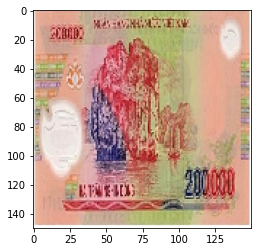

Tờ tiền 200k


In [15]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/nhandien/validation/200k/v1.jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Tờ tiền 100k")
if(kq==1):
    print("Tờ tiền 10k")
if(kq==2):
    print("Tờ tiền 1k")
if(kq==3):
    print("Tờ tiền 200")    
if(kq==4):
    print("Tờ tiền 200k")
if(kq==5):
    print("Tờ tiền 20k")
if(kq==6):
    print("Tờ tiền 2k")
if(kq==7):
    print("Tờ tiền 500")
if(kq==8):
    print("Tờ tiền 500k")
if(kq==9):
    print("Tờ tiền 50k")
if(kq==10):
    print("Tờ tiền 5k")